In [128]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('mushroom.csv')

In [92]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,2,1,1,...,1,1,1,1,1,1,2,2,2,2
2,2,1,3,1,3,1,1,2,2,1,...,1,1,1,1,1,1,2,2,3,2
3,1,2,3,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,4,2,4,1,2,2,1,2,...,1,1,1,1,1,2,2,3,2,2


In [62]:
#let's get the unique values for all columns, and then turn them into integer, to calculate the entropy
for col in df:
    if df[col].dtype == 'object' or df[col].dtype == 'bool':
        print(col, df[col].unique())

cap-shape ["b'x'" "b'b'" "b's'" "b'f'" "b'k'" "b'c'"]
cap-surface ["b's'" "b'y'" "b'f'" "b'g'"]
cap-color ["b'n'" "b'y'" "b'w'" "b'g'" "b'e'" "b'p'" "b'b'" "b'u'" "b'c'" "b'r'"]
bruises%3F ["b't'" "b'f'"]
odor ["b'p'" "b'a'" "b'l'" "b'n'" "b'f'" "b'c'" "b'y'" "b's'" "b'm'"]
gill-attachment ["b'f'" "b'a'"]
gill-spacing ["b'c'" "b'w'"]
gill-size ["b'n'" "b'b'"]
gill-color ["b'k'" "b'n'" "b'g'" "b'p'" "b'w'" "b'h'" "b'u'" "b'e'" "b'b'" "b'r'"
 "b'y'" "b'o'"]
stalk-shape ["b'e'" "b't'"]
stalk-root ["b'e'" "b'c'" "b'b'" "b'r'" "b'?'"]
stalk-surface-above-ring ["b's'" "b'f'" "b'k'" "b'y'"]
stalk-surface-below-ring ["b's'" "b'f'" "b'y'" "b'k'"]
stalk-color-above-ring ["b'w'" "b'g'" "b'p'" "b'n'" "b'b'" "b'e'" "b'o'" "b'c'" "b'y'"]
stalk-color-below-ring ["b'w'" "b'p'" "b'g'" "b'b'" "b'n'" "b'e'" "b'y'" "b'o'" "b'c'"]
veil-type ["b'p'"]
veil-color ["b'w'" "b'n'" "b'o'" "b'y'"]
ring-number ["b'o'" "b't'" "b'n'"]
ring-type ["b'p'" "b'e'" "b'l'" "b'f'" "b'n'"]
spore-print-color ["b'k'" "b'n'" "b'

In [87]:
#let's create another dataframe in wich the values will be integers
df2 = df
df2['cap-shape'] = df2['cap-shape'].replace(["b'x'", "b'b'", "b's'", "b'f'", "b'k'" ,"b'c'"], [1,2,3,4,5,6])
df2['cap-surface'] = df2['cap-surface'].replace(["b's'", "b'y'", "b'f'" ,"b'g'"], [1,2,3,4])
df2['cap-color'] = df2['cap-color'].replace(["b'n'", "b'y'", "b'w'" ,"b'g'" ,"b'e'", "b'p'", "b'b'", "b'u'", "b'c'" ,"b'r'"], [1,2,3,4,5,6,7,8,9,10])
df2['bruises%3F'] = df2['bruises%3F'].replace(["b't'" ,"b'f'"], [1,2])
df2['odor'] = df2['odor'].replace(["b'p'" ,"b'a'", "b'l'", "b'n'" ,"b'f'" ,"b'c'", "b'y'", "b's'" ,"b'm'"], [1,2,3,4,5,6,7,8,9])
df2['gill-attachment'] = df2['gill-attachment'].replace(["b'f'", "b'a'"], [1,2])
df2['gill-spacing'] = df2['gill-spacing'].replace(["b'c'" ,"b'w'"], [1,2])
df2['gill-size'] = df2['gill-size'].replace(["b'n'" ,"b'b'"], [1,2])
df2['gill-color'] = df2['gill-color'].replace(["b'k'", "b'n'", "b'g'" ,"b'p'" ,"b'w'" ,"b'h'", "b'u'", "b'e'" ,"b'b'" ,"b'r'", "b'y'" ,"b'o'"], [1,2,3,4,5,6,7,8,9,10,11,12])
df2['stalk-shape'] = df2['stalk-shape'].replace(["b'e'" ,"b't'"], [1,2])
df2['stalk-root'] = df2['stalk-root'].replace(["b'e'", "b'c'", "b'b'" ,"b'r'", "b'?'"], [1,2,3,4,5])
df2['stalk-surface-above-ring'] = df2['stalk-surface-above-ring'].replace(["b's'", "b'f'", "b'k'", "b'y'"], [1,2,3,4])
df2['stalk-surface-below-ring'] = df2['stalk-surface-below-ring'].replace(["b's'" ,"b'f'", "b'y'", "b'k'"], [1,2,3,4])
df2['stalk-color-above-ring'] = df2['stalk-color-above-ring'].replace(["b'w'", "b'g'", "b'p'", "b'n'", "b'b'", "b'e'", "b'o'" ,"b'c'" ,"b'y'"], [1,2,3,4,5,6,7,8,9])
df2['stalk-color-below-ring'] = df2['stalk-color-below-ring'].replace(["b'w'", "b'p'", "b'g'", "b'b'" ,"b'n'" ,"b'e'" ,"b'y'" ,"b'o'" ,"b'c'"], [1,2,3,4,5,6,7,8,9])
df2['veil-type'] = df2['veil-type'].replace(["b'p'"], [1])
df2['veil-color'] = df2['veil-color'].replace(["b'w'", "b'n'" ,"b'o'", "b'y'"], [1,2,3,4])
df2['ring-number'] = df2['ring-number'].replace(["b'o'", "b't'", "b'n'"], [1,2,3])
df2['ring-type'] = df2['ring-type'].replace(["b'p'", "b'e'", "b'l'", "b'f'", "b'n'"], [1,2,3,4,5])
df2['spore-print-color'] = df2['spore-print-color'].replace(["b'k'", "b'n'", "b'u'" ,"b'h'", "b'w'" ,"b'r'", "b'o'" ,"b'y'" ,"b'b'"], [1,2,3,4,5,6,7,8,9])
df2['population'] = df2['population'].replace(["b's'" ,"b'n'" ,"b'a'", "b'v'", "b'y'" ,"b'c'"], [1,2,3,4,5,6])
df2['habitat'] = df2['habitat'].replace(["b'u'", "b'g'", "b'm'", "b'd'", "b'p'", "b'w'" ,"b'l'"], [1,2,3,4,5,6,7])
df2['class'] = df2['class'].replace(["b'p'", "b'e'"], [1,2])


In [91]:
df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,2,1,2,1,1,2,1,1,...,1,1,1,1,1,1,2,2,2,2
2,2,1,3,1,3,1,1,2,2,1,...,1,1,1,1,1,1,2,2,3,2
3,1,2,3,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,4,2,4,1,2,2,1,2,...,1,1,1,1,1,2,2,3,2,2


#### We want to calculate the entropy for some variable and also the whole set.
#### Entropy informs us the amount of uncertainty involved in the value of a variable

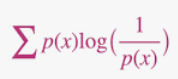

##### The Gini Index is a statistical measure of distribution. Given a frequency distribution, it quantifies how unequal the values are.

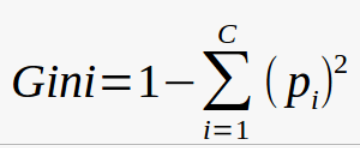

In [98]:
probability_arr = []
entropy_arr = []
gini_arr = []
info_arr = []

for col in df.drop(columns='class'):
    probability = df[col].value_counts(normalize=True)
    print(col, 'probability')
    probability_arr.append(probability)
    print(probability)

    #Entropy = -(p(0) * log(P(0)) + p(1) * log(P(1)))
    entropy = -1 * np.sum(np.log2(probability) * probability)
    print(col, 'entropy: ', entropy)
    entropy_arr.append(entropy)

    #Gini impurity is calculated by subtracting the sum of the squared probability
    gini_index = 1 - np.sum(np.square(probability))
    print(col, 'gini_index: ', gini_index)
    gini_arr.append(gini_index)

    #Information gain is calculated by multiplying the probability of a class by the log times the prob.
    info_gain = np.log2(probability) * probability
    print(col, 'information gain: ', info_gain, '\n')
    info_arr.append(info_gain)

cap-shape probability
1    0.450025
4    0.387986
5    0.101920
2    0.055638
3    0.003939
6    0.000492
Name: cap-shape, dtype: float64
cap-shape entropy:  1.652888910701876
cap-shape gini_index:  0.6334455040908266
cap-shape information gain:  1   -0.518394
4   -0.529959
5   -0.335775
2   -0.231886
3   -0.031464
6   -0.005410
Name: cap-shape, dtype: float64 

cap-surface probability
2    0.399311
1    0.314623
3    0.285574
4    0.000492
Name: cap-surface, dtype: float64
cap-surface entropy:  1.5754864002124502
cap-surface gini_index:  0.6600106037366171
cap-surface information gain:  2   -0.528854
1   -0.524887
3   -0.516336
4   -0.005410
Name: cap-surface, dtype: float64 

cap-color probability
1     0.281142
4     0.226489
5     0.184638
2     0.131955
3     0.128016
7     0.020679
6     0.017725
9     0.005416
8     0.001969
10    0.001969
Name: cap-color, dtype: float64
cap-color entropy:  2.5101426768864856
cap-color gini_index:  0.8009913305847013
cap-color information gain: 

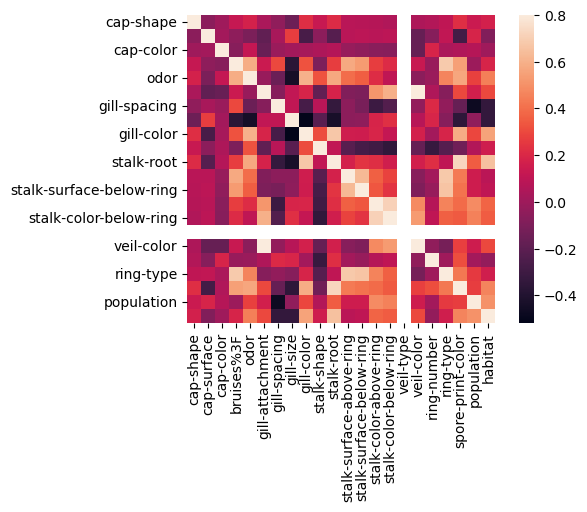

In [103]:
#So now we have statiscal measures that will help us choose the independent variables
#Let's check how the features are correlated

y = df['class']
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

corrmat = X.corr()
f, ax = plt.subplots(figsize=(6,4))
sns.heatmap(corrmat, vmax=.8, square=True);


In [112]:
#Now, creating a decision tree classifier using sklearn to train and fit the data into the model
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [132]:
#We already have X and y

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.5, random_state=0)

tree = DecisionTreeRegressor(max_depth=13)
tree.fit(Xtr, ytr)

p = tree.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

0.0

[Text(0.7, 0.95, 'odor <= 4.5\nsquared_error = 0.25\nsamples = 4062\nvalue = 1.516'),
 Text(0.6333333333333333, 0.85, 'odor <= 1.5\nsquared_error = 0.079\nsamples = 2297\nvalue = 1.913'),
 Text(0.5666666666666667, 0.75, 'squared_error = 0.0\nsamples = 137\nvalue = 1.0'),
 Text(0.7, 0.75, 'spore-print-color <= 5.5\nsquared_error = 0.028\nsamples = 2160\nvalue = 1.971'),
 Text(0.5333333333333333, 0.65, 'stalk-color-below-ring <= 6.5\nsquared_error = 0.013\nsamples = 2055\nvalue = 1.986'),
 Text(0.4, 0.55, 'cap-shape <= 5.5\nsquared_error = 0.006\nsamples = 2016\nvalue = 1.994'),
 Text(0.3333333333333333, 0.45, 'cap-surface <= 3.5\nsquared_error = 0.005\nsamples = 2014\nvalue = 1.995'),
 Text(0.26666666666666666, 0.35, 'stalk-color-below-ring <= 4.0\nsquared_error = 0.004\nsamples = 2013\nvalue = 1.996'),
 Text(0.13333333333333333, 0.25, 'habitat <= 6.5\nsquared_error = 0.001\nsamples = 1922\nvalue = 1.999'),
 Text(0.06666666666666667, 0.15, 'squared_error = 0.0\nsamples = 1921\nvalue = 2

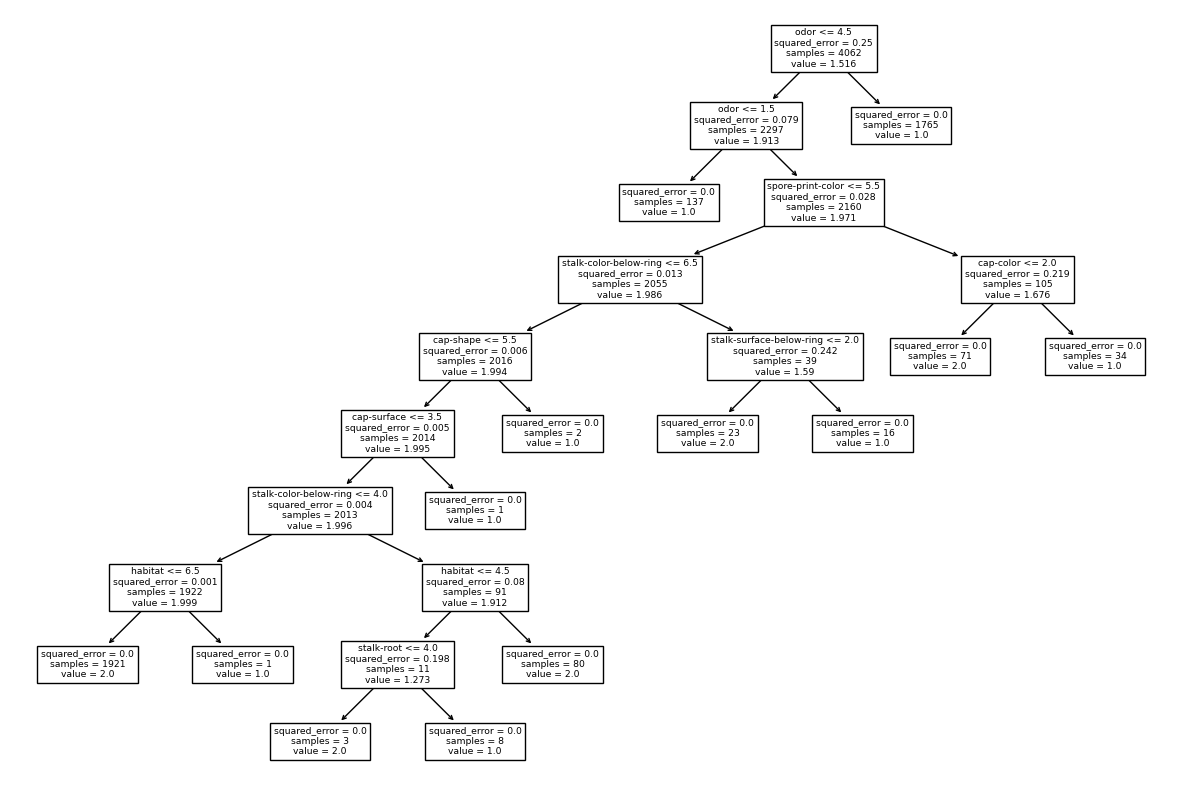

In [133]:
pylab.figure(figsize=(15,10))
plot_tree(tree, feature_names=Xtr.columns)

In [136]:

model = tree.fit(X,y)
print(model.score(X,y))

1.0


In [139]:
#making predictions on sample data
print(model.predict([[2,1,2,2,2,2,1,2,1,2,1,2,1,2,2,1,2,1,2,1,2,1]]))

[2.]
